# 기초통계 검정 방법론
- 모수통계
  - A 통계검정 방법론(가정1, 가정2, 가정3 모두 충족할때)
- 비모수 통계 (= 모수가 아닌 통계)

# 베이지안 통계 vs 모수 통계
- 모수 통계 : 평균에 기반한 통계 검정
- 베이지안 통계 : 확률에 기반한 통계 검정


# t - test
- 평균의 비교
# z-test 
- 실무에서 정말 쓸모없는 test
- 전제조건: 모집단의 편균과 표준편차를 알아야 함
- 가설검정 에 쓰이는게 z-test인데 어짜피 모집단의 평균을 알기 때문에 실무에서는 쓸모없고 추출된 표본이 동일 모집단에 실제로 속하는지 검증할때는 쓰인다.
  - 귀무가설 : 표본 평균이 모집단의 평균과 같음
  - 대립가설 : 표폰 평균이 모집단의 평균과 같지 않음

# 예제
- 모집단의 평균과 표준편차를 알고 있음
  - 평균 : 67.5 (심리학 점수)
  - 표준편차 : 9.5

In [1]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/ethanweed/pythonbook/main/Data/zeppo.csv")
df.head()

,grades
0,50
1,60
2,60
3,64
4,66


In [2]:
df['grades'].min(), df['grades'].max()

(50, 89)

# 시각화
- 평균이 67.5, 표준편차가 9.5인 그래프 작성
- 모집단의 수는 100개로 가정
- 히스토그램이 의미하는 것은 20개의 샘플을 추출

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats

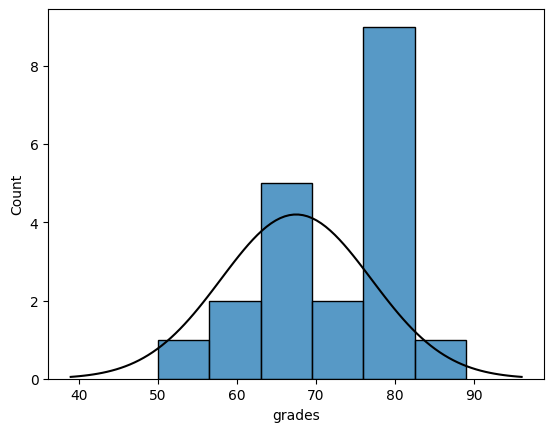

In [7]:
mu = 67.5
sigma = 9.5

# 정규분포를 만들기 위한 코드
x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 100)
y = 100 * stats.norm.pdf(x, mu, sigma)

fig , ax = plt.subplots()
ax1 = sns.histplot(df['grades'])
ax2 = sns.lineplot(x = x , y = y, color = 'black')

plt.show()

# 가설 세우기
- 귀무가설 : 표본샘플(N=20)의 평균은 67.5이다.
- 대립가설 : 표본샘플(N=20)의 평균은 67.5가 아다.

In [9]:
import statistics
statistics.mean(df['grades'])

72.3

- 모집단의 평균 67.5
- 표본의 평균 72.3

- 모집단의 평균과 표본의 평균의 다르다고 볼 수 있을까?
- 우연히 샘플링 에러로 72.3이 나올수 있겠지
- 결정을 어떻게 내릴까?
- 중심 극한정리로 여러번 해보면 되지 않을까?

# z - 통계량
- 각 데이터 값이 평균으로부터 얼마나 떨어져 있는지를 나타내는 통계량
 - 표준화된 수치

In [10]:
grades = df['grades'] # 샘플
sample_mean = statistics.mean(grades)
sample_mean # 샘플의 평균

72.3

In [13]:
sd_true = 9.5 # 모집단과 샘플의 표준편차
mu_null = 67.5 # 모집단의 평균
N = len(grades)

# 표준오차 



In [14]:
import math
sem_true = sd_true / math.sqrt(N)
sem_true

2.1242645786248002

# z_score(z 통계량)

In [17]:
z_score = (sample_mean -mu_null) / sem_true
z_score

2.259605535157681

In [18]:
from statistics import NormalDist

In [20]:
lower_area = NormalDist().cdf(-z_score) # 평균이 0이고 표준편차가 1인 정규분포 객체 생성 cdf: 확률변수 x가 주어진 값보다 작거나 같을 확률값을 알려줌, 또 주어진 값에서 정규분포의 누적분포 함수를 계산할 때 사
upper_area = lower_area
p_value = lower_area + upper_area
p_value

0.023845743764939753

# 결론
- p-value 가 0.02고 z-score가 2.22이기 때문에 귀무가설을 기각하고, 대립가설을 채택한다.
- 대립가설: 표본샘플(N=20)의 평균은 67.5가 아니다

- 실무적으로 적용
- 감자침 과자, 총 150g 있다고 표기! 150g은 모집단의 평규

# 테스트 
- 전제조건
  - 전국 고등학교의 편균 국어 점수 67.5
  - 우리 고등학교의 평균 국어 점수 72.3
- 가설설정
  - 귀무가설 : 전국 고등학생의 평균 국어 점수와 우리 고등학교의 편균 국어 점수는 통계적으로 유의하게 같다
  - 대립가설 : 전국 고등학생의 평균 국어 점수와 우리 고등학교의 편균 국어 점수는 통계적으로 유의하게 같지 않다.

# t 통계량, p-value값 구하기
- 매우쉽다!

In [21]:
from scipy.stats import ttest_1samp

In [23]:
t_statistic, p_value = ttest_1samp(a = df['grades'], popmean=67.5)
t_statistic, p_value

(2.25471286700693, 0.03614521878144544)